<h1>Import Required Libraries</h1>

In [2]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.pyplot import imshow
# Technically not necessary in newest versions of jupyter
%matplotlib inline

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose, ZeroPadding2D
from keras.layers import Flatten, MaxPooling2D, AveragePooling2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import to_categorical

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.initializers import glorot_uniform
from sklearn.utils import shuffle

from time import time
import numpy as np

<h1>Data Preprocessing</h1>

In [3]:
my_data_dir = 'D:\\Pycharm\\Anomalous_detection_CNN\\data_four_poses'

In [4]:
os.listdir(my_data_dir) 

['test', 'train']

In [5]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [6]:
os.listdir(test_path)

['climb', 'crawl', 'normal', 'squat']

In [7]:
os.listdir(train_path)

['climb', 'crawl', 'normal', 'squat']

In [8]:
train_x = []
train_y = []
for i in os.listdir(train_path):
    data_path = train_path + i + "\\"
    print(data_path)
    filenames = [x for x in os.listdir(data_path)]
    
    for f in filenames:
        img = cv2.imread(data_path + f)
        img = cv2.resize(img,(225, 85))
        train_x.append(img)
        train_y.append(i)
#print(train_y)

D:\Pycharm\Anomalous_detection_CNN\data_four_poses\train\climb\
D:\Pycharm\Anomalous_detection_CNN\data_four_poses\train\crawl\
D:\Pycharm\Anomalous_detection_CNN\data_four_poses\train\normal\
D:\Pycharm\Anomalous_detection_CNN\data_four_poses\train\squat\


In [9]:
test_x = []
test_y = []
for i in os.listdir(test_path):
    data_path = test_path + i + "\\"
    print(data_path)
    filenames = [x for x in os.listdir(data_path)]
    
    for f in filenames:
        img = cv2.imread(data_path + f)
        img = cv2.resize(img,(225, 85))
        test_x.append(img)
        test_y.append(i)

D:\Pycharm\Anomalous_detection_CNN\data_four_poses\test\climb\
D:\Pycharm\Anomalous_detection_CNN\data_four_poses\test\crawl\
D:\Pycharm\Anomalous_detection_CNN\data_four_poses\test\normal\
D:\Pycharm\Anomalous_detection_CNN\data_four_poses\test\squat\


In [10]:
train_x = np.array(train_x)
print(train_x.shape)
test_x = np.array(test_x)
print(test_x.shape)

(5200, 85, 225, 3)
(2000, 85, 225, 3)


In [11]:
train_x = train_x.astype('float32')/ 255.0
test_x = test_x.astype('float32')/ 255.0

In [12]:
train_x, train_y = shuffle(train_x, train_y)
test_x, test_y = shuffle(test_x, test_y)

In [13]:
def y_test_cat(p):
    if(p=='climb'):
        return 0
    elif(p=='crawl'):
        return 1
    elif(p=='normal'):
        return 2
    elif(p=='squat'):
        return 3

In [14]:
test_y = np.array(test_y)
test_y_cat = map(y_test_cat, test_y)

test_y_cat = list(test_y_cat)
print(test_y_cat)

[3, 2, 1, 3, 0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 3, 0, 1, 1, 0, 3, 3, 3, 0, 1, 1, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 1, 1, 3, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 0, 3, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 3, 3, 1, 2, 1, 1, 0, 0, 2, 1, 3, 2, 3, 3, 1, 1, 2, 1, 0, 1, 3, 2, 3, 1, 0, 0, 1, 0, 2, 1, 3, 3, 2, 0, 2, 1, 0, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 0, 2, 1, 0, 3, 1, 1, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 0, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 0, 3, 0, 0, 0, 1, 2, 1, 1, 3, 2, 3, 2, 2, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 2, 3, 2, 2, 1, 3, 2, 3, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 3, 2, 1, 0, 3, 2, 0, 0, 0, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 2, 2, 2, 1, 3, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 3, 3, 2, 2, 3, 2, 0, 3, 2, 3, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 1, 3, 3, 3, 3, 1, 0, 0, 2, 3, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 0, 3, 0, 3, 1, 1, 2, 1, 0, 3, 0, 3, 3, 2, 3, 0, 0, 2, 2, 3, 1, 1, 2, 3, 3, 

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(train_y)

y = y.reshape(-1, 1)
onehotencoder = OneHotEncoder(categorical_features=[0])
train_y = onehotencoder.fit_transform(y)
print(train_y.shape)
print(train_y)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(5200, 4)
  (0, 3)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 3)	1.0
  (8, 0)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (15, 3)	1.0
  (16, 2)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 3)	1.0
  (23, 2)	1.0
  (24, 0)	1.0
  :	:
  (5175, 1)	1.0
  (5176, 3)	1.0
  (5177, 2)	1.0
  (5178, 0)	1.0
  (5179, 2)	1.0
  (5180, 0)	1.0
  (5181, 1)	1.0
  (5182, 2)	1.0
  (5183, 2)	1.0
  (5184, 2)	1.0
  (5185, 3)	1.0
  (5186, 0)	1.0
  (5187, 2)	1.0
  (5188, 0)	1.0
  (5189, 2)	1.0
  (5190, 3)	1.0
  (5191, 3)	1.0
  (5192, 3)	1.0
  (5193, 0)	1.0
  (5194, 0)	1.0
  (5195, 1)	1.0
  (5196, 0)	1.0
  (5197, 1)	1.0
  (5198, 0)	1.0
  (5199, 2)	1.0


In [16]:
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(test_y)

y = y.reshape(-1, 1)
onehotencoder = OneHotEncoder(categorical_features=[0])
test_y = onehotencoder.fit_transform(y)
test_y.shape

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(2000, 4)

In [17]:
os.listdir(train_path+'\\normal')[0]

'Image0.png'

In [18]:
stick_figure = train_path+'\\normal'+'\\Image0.png'

In [19]:
stick_fig_img = imread(stick_figure)

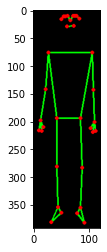

In [20]:
plt.imshow(stick_fig_img)

In [21]:
stick_fig_img.shape

(392, 121, 3)

In [22]:
len(os.listdir(train_path+'\\normal'))

1300

In [23]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\normal'):
    
    img = imread(test_path+'\\normal'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

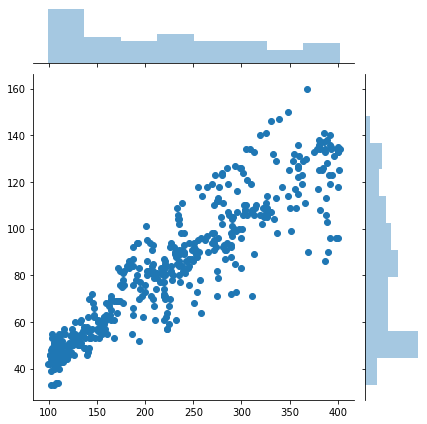

In [24]:
sns.jointplot(dim1,dim2)

In [25]:
np.mean(dim1)

220.694

In [26]:
np.mean(dim2)

81.036

In [27]:
image_shape = (225,85,3)

<h1>Define ResNet34 architecture</h1>

In [28]:
def identity_block(X, f, filters):
    F1, F2 = filters
    X_shortcut  = X
    X = Conv2D(filters = F1, kernel_size = (1,1), strides= (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = F2, kernel_size = (f,f), strides= (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    #X = Conv2D(filters = F3, kernel_size = (1,1), strides= (1,1), padding = 'valid')(X)
    #X = BatchNormalization(axis = 3)(X)
    #X = Add()([X, X_shortcut])
    #X = Activation('relu')(X)
    
    return X

In [29]:
def convolutional_block(X, f, filters, s=2):
    F1, F2 = filters
    X_shortcut  = X
    X = Conv2D(filters = F1, kernel_size = (1,1), strides= (s,s))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = F2, kernel_size = (f,f), strides= (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    #X = Conv2D(filters = F3, kernel_size = (1,1), strides= (1,1), padding = 'valid')(X)
    #X = BatchNormalization(axis = 3)(X)
    
    X_shortcut = Conv2D(filters = F2, kernel_size = (1,1), strides= (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [30]:
def ResNet34(input_shape=(85,225,3), classes = 4):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(64, (7,7), strides=(2,2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3), strides=(2,2))(X)
    
    #X = convolutional_block(X, f=3, filters = [64,64], s=1)
    
    X = identity_block(X, 3, [64,64])
    
    X = identity_block(X, 3, [64,64])
    
    X = identity_block(X, 3, [64,64])
    
    X = convolutional_block(X, f=3, filters = [128,128], s=2)
    X = identity_block(X, 3, [128,128])
    X = identity_block(X, 3, [128,128])
    X = identity_block(X, 3, [128,128])
    
    X = convolutional_block(X, f=3, filters = [256,256], s=2)
    X = identity_block(X, 3, [256,256])
    X = identity_block(X, 3, [256,256])
    X = identity_block(X, 3, [256,256])
    X = identity_block(X, 3, [256,256])
    X = identity_block(X, 3, [256,256])
    
        
    X = convolutional_block(X, f=3, filters = [512,512], s=2)
    X = identity_block(X, 3, [512,512])
    X = identity_block(X, 3, [512,512])
    
    X = AveragePooling2D((2,2), name="avg_pool")(X)
    
    X = Flatten()(X)
    X = Dense(classes, activation = 'softmax', name='fc'+str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'ResNet34')
    
    return model

In [31]:
model = ResNet34(input_shape=(85,225,3), classes = 4)

In [32]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [33]:
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 85, 225, 3)   0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 91, 231, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 113, 64)  9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 43, 113, 64)  256         conv2d_1[0][0]                   
___________________________________________________________________________________________

<h1>Train the model</h1>

In [34]:
model.fit(train_x, train_y, validation_data=(test_x,test_y),epochs = 10, batch_size = 32)


Train on 5200 samples, validate on 2000 samples
Epoch 1/10
5200/5200 [==============================] - 860s 165ms/step - loss: 0.4565 - accuracy: 0.9294 - val_loss: 4.6794 - val_accuracy: 0.2500
Epoch 2/10
5200/5200 [==============================] - 619s 119ms/step - loss: 0.0616 - accuracy: 0.9810 - val_loss: 1.9575 - val_accuracy: 0.4120
Epoch 3/10
5200/5200 [==============================] - 639s 123ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.1732 - val_accuracy: 0.9600
Epoch 4/10
5200/5200 [==============================] - 601s 116ms/step - loss: 0.0390 - accuracy: 0.9888 - val_loss: 0.1332 - val_accuracy: 0.9700
Epoch 5/10
5200/5200 [==============================] - 588s 113ms/step - loss: 0.0240 - accuracy: 0.9927 - val_loss: 0.4285 - val_accuracy: 0.8810
Epoch 6/10
5200/5200 [==============================] - 589s 113ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0790 - val_accuracy: 0.9820
Epoch 7/10
5200/5200 [==============================] - 586s 11

<h1>Evaluate and Visualize Metrics</h1>

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
losses = pd.DataFrame(model.history.history)

In [37]:
losses.head()

,val_loss,val_accuracy,loss,accuracy
0,4.679430,0.250,0.456454,0.929423
1,1.957531,0.412,0.061643,0.980962
2,0.173200,0.960,0.040272,0.987308
3,0.133247,0.970,0.038992,0.988846
4,0.428479,0.881,0.023956,0.992692


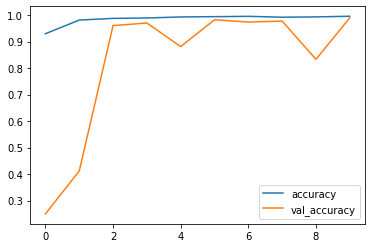

In [38]:
losses[['accuracy','val_accuracy']].plot()

In [39]:
model.save('ResNet34_with_shuffle_2.h5')

<h1>Test the model on Sample Image</h1>

In [40]:
from matplotlib.pyplot import imread

(1, 85, 225, 3)
[[8.0703534e-12 9.6241090e-14 5.3250928e-11 1.0000000e+00]
 [3.3177772e-15 4.1763895e-15 1.0000000e+00 8.8777961e-12]
 [1.0099283e-09 1.0000000e+00 1.6519583e-10 3.2541865e-09]
 ...
 [2.7023026e-19 4.9513170e-18 1.0000000e+00 1.4120288e-12]
 [1.0000000e+00 1.5924084e-16 5.8386502e-15 5.6529732e-11]
 [3.9608580e-08 9.9999988e-01 3.4510943e-11 9.2631062e-08]]


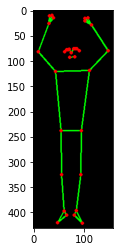

In [41]:
img_path = train_path+'\\climb'+'\\Image0.png'
img = image.load_img(img_path, target_size = (85,225))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
my_img = imread(img_path)
imshow(my_img)
predictions = model.predict(test_x)
print(predictions)

In [42]:
def prediction_classes(p):
    max_value  = 0
    maxi = 0
    for i in range(4):
        temp = p[i]
        if temp>max_value:
            max_value = temp
            maxi = i
    return maxi

In [43]:
predictions = np.array(predictions)
predictions = map(prediction_classes, predictions)

pred = list(predictions)
print(pred)

[3, 2, 1, 3, 0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 3, 0, 1, 1, 0, 3, 3, 3, 0, 1, 1, 1, 0, 1, 0, 2, 1, 3, 1, 1, 3, 1, 1, 3, 3, 0, 3, 3, 1, 2, 1, 0, 0, 0, 0, 3, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 3, 3, 1, 2, 1, 1, 0, 0, 2, 1, 3, 2, 3, 3, 1, 1, 2, 1, 0, 1, 3, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 3, 2, 0, 2, 1, 0, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 0, 2, 1, 0, 3, 1, 1, 2, 3, 0, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 0, 0, 1, 3, 2, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 0, 3, 0, 0, 0, 1, 2, 1, 1, 3, 2, 3, 2, 2, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 3, 3, 2, 2, 1, 3, 2, 3, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 3, 3, 1, 0, 3, 2, 0, 0, 0, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 2, 2, 2, 1, 3, 2, 0, 1, 3, 2, 1, 2, 2, 1, 0, 1, 2, 1, 3, 3, 2, 2, 3, 2, 0, 3, 2, 3, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 1, 3, 3, 3, 3, 1, 0, 0, 2, 3, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 0, 3, 0, 3, 1, 1, 2, 1, 0, 3, 0, 3, 3, 2, 3, 0, 0, 2, 2, 3, 1, 1, 2, 3, 3, 

In [44]:
pred = np.array(pred)
print(pred)

[3 2 1 ... 2 0 1]


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(test_y_cat,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       1.00      0.99      1.00       500
           2       0.99      0.98      0.98       500
           3       0.98      0.99      0.99       500

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [47]:
confusion_matrix(test_y_cat,pred)

array([[498,   0,   1,   1],
       [  2, 496,   2,   0],
       [  4,   0, 489,   7],
       [  2,   0,   2, 496]], dtype=int64)